# How long would it take to fall through the Earth?

## Learning Objectives

The student will be able to:
- Apply the Shell-Theorem to find forces within a non-uniform body **(Exercises 1 - 3)**
- Use the Euler-Cromer method to calculate movement under the effect of a varying gravity **(Exercises 4, 7, 8)**
- Interpret plots of position/velocity/acceleration/mass and identify the connections between them **(Exercise 5)**
    - Justify the different behaviour of graphs in terms of the chaning property of the Earth **(Exercises 6, 9, 10)**

## Gravity inside the Earth

What would happen if the ground under you disappeared and you fell all the way to the center of the Earth? What if someone somehow made a tunnel from the surface to the core? How fast would you go along the way? How long would it take to fall all the way through?

To anwser these questions, you will need to understand the effects of gravity inside of the Earth.

First though, import these libraries by running the code block below. These give you access to useful functions like np.sin(), plt.plot() and so on.

In [13]:
import numpy as np #Used for mathematical functions and constants
import matplotlib.pyplot as plt #Used for plotting

### Gravity

The gravitational force between two objects is given by $F = \frac{GMm}{r^2}$

where G is the gravitational constant $6.68\times10^-11\frac{Nm^2}{kg^2}$, M is the mass of one of the objects, m is the mass of the other object and r is the distance between the objects. The force acts on both of the objects, and is pointed from one object to the other. Furthermore, Newtons second law gives us that:

$$
\begin{align*}
F = ma \Rightarrow a = \frac{F}{m} = \frac{GMm}{r^2m} = \frac{GM}{r^2}
\end{align*}
$$

This means that the gravitational acceleration at any given time is dependant only on the mass of the object pulling on you, and your distance to it.

**EXCERCISE 1:**

Write the function **gravAccel(totalmass, position)** that takes the mass of the object exerting the gravitational force, and the position relative to it as parameters, and returns the resultant gravitational **acceleration**. Make the function take the direction of the force into account. A positive position corresponds to being above the object, and a negative position corresponds to being below the object. What result does a position of 0 give?

In [14]:
G = 6.674e-11 #The gravitational constant

def gravAccel(mass, pos):
    if pos == 0: #Making sure I'm not dividing by zero
        return 0
    return -G * mass / (abs(pos)**3) * pos

### The Shell Theorem

The main difference between being affected by gravity while outside the Earth, and being affected while inside it, is how much of it is below you to "pull you down", and how much is above you to "pull you up". As you venture further down, less of the Earth will be below you to pull you down, and more of it will be above you to pull you up. In addition to this, as you get closer to different parts of the Earth, they will have a greater pull on you due to being closer to you (**this will be important later**).

If we assume the Earth is perfectly spherical, the sum of these effects are described by the [Shell Theorem](http://hyperphysics.phy-astr.gsu.edu/hbase/Mechanics/sphshell2.html), which makes this problem much simpler. The Shell Theorem has the following implications for our problem:

- A spherically symmetric body affects external objects gravitationally as though all of its mass were concentrated at a point at its centre
- When at a distance r from the center, all mass at a greater distance than r can be ignored

This means that we do not have to calculate the gravitational pull from all throughout the Earth, since we can act as if all of the Earth's mass is located in its center. We also only need to worry about the what is further in than the point you are currently at.

<img src="https://raw.githubusercontent.com/KarlHenrik/Jupyter-Book-Showroom/master/content/features/activities/FallingThroughTheEarth/ShellTheorem.jpg" alt="Drawing" style="width: 50%;"/>

## Falling through a uniform Earth

To start with, assume that the Earth has a constant density (a uniform Earth). This will make the problem easier to solve, and will make for a good foundation for later, when you will look at falling through a non-uniform Earth.

### Finding gravitational acceleration inside of a uniform Earth

**EXERCISE 2:**

Use the Earth's total mass and radius to calculate the density of a uniform Earth.

Using this density, write the function **sphereMass(distance)** that takes the distance from the center of the Earth as an argument, and returns the mass of a sphere with that distance as radius, and with the same density as the uniform Earth. *(This sphere will be the equivelant of the red area in the figure above.)* Why was it specified that the function takes distance as an argument, and not position?

In [36]:
earthMass = 5.972 * 10**24 #The Earth's total mass in kg
earthRadius = 6.371 * 10**6 #The Earth's radius in metres

earthVolume = 4/3 * np.pi * earthRadius**3

uniDensity = earthMass/earthVolume

def sphereMass(distance):
    return 4/3 * np.pi * distance**3 * uniDensity

**EXERCISE 3:**

Using the **gravAccel** function, the **sphereMass** function, and the implications of the Shell Theorem, write the function **uniformGravityAccel(position)** that calculates the gravitational acceleration at any position relative to the center of a uniform Earth.

In [16]:
def uniformGravityAccel(pos):
    return gravAccel(sphereMass(abs(pos)), pos)

## Calculating the fall through a uniform Earth

So far you have a function for acceleration given current position inside of a uniform Earth. Forthermore, if you assume that the fall starts off from the Earth's surface with no velocity, you also have the initial conditions of the fall. Using these two things, the acceleration function and the initial conditions, you can calculate the entire fall using a numerical method. Using a numerical method is not needed to calculate the fall through a uniform Earth, but these principles will prove very useful later when calculating a fall through a non-uniform Earth, where the acceleration function is much more complicated.

### Initializing variables and arrays

The numerical method that will be used in this exercise set is the Euler-Cromer method. Like most numerical methods, it uses the fact that although velocity and acceleration might be changing constantly, if you look at them over a very tiny time step they are essentially constant. Using this principle, you can calculate a long series of linear motions with constant velocity, acheiving surprisingly accurate results.

How long the time steps should be and how many time steps you want is often found by trial and error. 5000 time steps of 1 second will work well here, although this resolution will be insufficient for many other calculations. To store the results of the calculations, arrays are created. These are in many ways like lists, although their size cannot be changed and are in many cases more efficient.

In [17]:
n = 5000
dt = 1

acceleration = np.zeros(n) #An array filled with 5000 zeroes, ready to be filled with acceleration values
velocity = np.zeros(n) #The initial velocity of 0 is "automatically" set
position = np.zeros(n)

position[0] = earthRadius #Setting the initial condition of the fall starting at the surface of the Earth

times = np.linspace(0, n*dt, n) #An array of 5000 time values to be used for plotting

### The Euler-Cromer loop

**EXERCISE 4:**

Do the Euler-Cromer calculation of a fall through a uniform Earth with the initial conditions from above, and an acceleration given by the **uniformGravityAccel** function. (The current position during the loop will in this case be position[i])

Here is a template for how the Euler-Cromer method can look:

    for i in range(n-1):
        acceleration[i] = function(arguments)
        velocity[i+1] = velocity[i] + acceleration[i] * dt
        position[i+1] = position[i] + velocity[i+1] * dt
    acceleration[n-1] = function(arguments) #This last line simply lets the final acceleration value be filled in for plotting, although it is not used for the calculation

In [18]:
for i in range(n-1):
    acceleration[i] = uniformGravityAccel(position[i])
    velocity[i+1] = velocity[i] + acceleration[i] * dt
    position[i+1] = position[i] + velocity[i+1] * dt
acceleration[n-1] = uniformGravityAccel(position[n-1])

### Plotting the results

Plotting often involves a lot of functions to fill in all of the neccecary information, though a simple plot(x,y) -> show() can often be sufficient.

Here is an example of how code to plot these results can look. Hopefully the previous calculations made these plots look reasonable

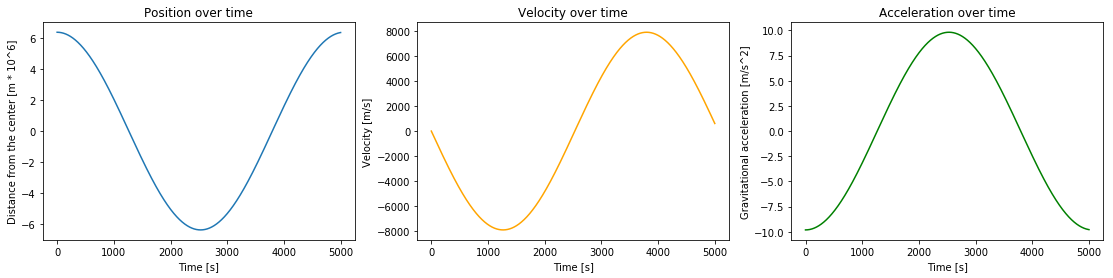

In [19]:
plt.figure(figsize=(19,4)) #Specifies the size of the plotting figure. Useful for making subplots look nice in jupyter
plt.subplot(131) #1 row, 3 columns, this is the 1st plot
plt.plot(times, position/(10**6))
plt.title("Position over time")
plt.xlabel("Time [s]")
plt.ylabel("Distance from the center [m * 10^6]")

plt.subplot(132) #1 row, 3 columns, this is the 2nd plot
plt.plot(times, velocity, color="orange")
plt.title("Velocity over time")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")

plt.subplot(133) #1 row, 3 columns, this is the 3rd plot
plt.plot(times, acceleration, color="green")
plt.title("Acceleration over time")
plt.xlabel("Time [s]")
plt.ylabel("Gravitational acceleration [m/s^2]")
plt.show()

### Interpreting Results

**EXERCISE 5:**

**a)**
Run the above code so that position, velocity and acceleration are plotted side by side.

**b)**
Find the time it takes to fall through the uniform Earth.

In [34]:
print("It took {:.0f} seconds to fall through the Earth".format(times[np.argmin(position)]))

It took 2531 seconds to fall through the Earth


**c)**
Find the maximum velocity along the way.

In [35]:
print("The maximum velocity was {:.0f} m/s".format(np.amax(velocity)))

The maximum velocity was 7910 m/s


**d)**
Comment on the results. Why do the graphs look the way they do? And specifically:
- Why are the plots for position and acceleration so similar? (look at acceleration as a function of position, and the properties of the derivative of sine waves)

Position and acceleration have the opposite shapes due to one being a function of the other. In the function for gravity, gravity is inversely proportional to the square of the distance from the center. In the function for the mass of the mini-Earth I need to consider, mass is proportional to the cube of the distance from the center. All in all, this becomes a relation where gravitational acceleration is proportional to the distance from the center, with some negative constant. The velocity goes from very negative to very positive during the time that the gravitational acceleration is at its highest.

The position and acceleration being linearly dependant points to them being sine waves, as the double derivative of a sine wave is the negative of the same wave(with some constants). And this also leads to the velocity being a cosine wave with only slightly different parameters.

## Falling through a non-uniform Earth

So far you have looked at a fall through a uniform Earth, but the Earth is not uniform. The core, mantle and crust have very different densities, which changes the gravity during the fall and thus the nature of the fall significantly. Building a model for gravity inside of the real non-uniform Earth requires reading data, manipulating data and finally fitting data. You will not be required to do this however, as you will only be required to use the new gravity function like you used your previous gravity function. However, you are encouraged to try to understand as much of it as you can, as working with real data is one of the biggest strenghts of doing computational physics.

## Implementing the  variable density of the Earth

This figure shows how the different layers and densities of the Earth fit together.

<img src="https://raw.githubusercontent.com/KarlHenrik/Jupyter-Book-Showroom/master/content/features/activities/FallingThroughTheEarth/RadialDensityPREM.jpg" alt="Drawing" style="width: 40%;"/>

*(taken from <a href="https://en.wikipedia.org/wiki/Structure_of_the_Earth">en.wikipedia.org/wiki/Structure_of_the_Earth</a>)*

### Reading the data

The Preliminary Reference Earth Model is a model which gives us the density of the Earth at different distances from the center.

The data can be found here: http://ds.iris.edu/ds/products/emc-prem/ at "Model Download". I use the file "PREM_ANISOTROPIC".

**Make sure that you have the "PREM_ANISOTROPIC.txt" file in the same folder as the notebook file, or this won't work!**

Let us read the data and store them in arrays.

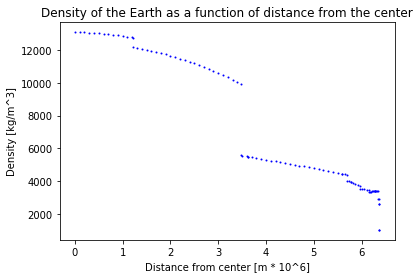

In [21]:
radiusData = np.zeros(97) #Array to store data
densityData = np.zeros(97)
i = 0 #Index for the current line in the file

#The file has 97 lines of data starting with "[Radius] [Density]" that are read like this
infile = open("PREM_ANISOTROPIC.txt","r")
lines = infile.readlines()
for line in lines[3:]: #The data starts at line 3.
    numbers = line.split() #Turns the line of text into a list of strings
    radiusData[i] = float(numbers[0]) #Saves the radius value
    densityData[i] = float(numbers[1]) #Saves the density value
    i += 1
infile.close()

plt.plot(radiusData/(10**6), densityData, "bo", markersize = 1)
plt.title("Density of the Earth as a function of distance from the center")
plt.xlabel("Distance from center [m * 10^6]")
plt.ylabel("Density [kg/m^3]")
plt.show()

Here you can see the 97 data points showing the density of the Earth at different distances from the center. It seems to agree with the figure further above.

### Manipulating data - Mass at different heights

Like in the uniform case, you need the total mass further in than a given distance to find gravity at a given distance. By working our way from the center we can add one and one "shell" to find the total mass at different distances from the center. The mass and size of each shell is found by first finding the mass of two spheres using the density of the shell we are interested in, and then subtracting the inner sphere from the outer one, leaving us with the mass of the shell.

![title](https://raw.githubusercontent.com/KarlHenrik/Jupyter-Book-Showroom/master/content/features/activities/FallingThroughTheEarth/EarthShells.jpg)

Note that we use the same density for the inner and outer sphere to calculate the mass of the shell. The density we use for the spheres is the average of the Earth's density at the outer and inner radius of the shell. So that:

$$ M_{shell} = M_{outer} - M_{inner} = \frac{4}{3}\pi r_{outer}^3 Density - \frac{4}{3}\pi r_{inner}^3 Density $$

In [22]:
massData = np.zeros(97)

for i in range(1,len(radiusData)):
    shellDensity = (densityData[i-1]+densityData[i])/2 #The average of the density at the outer and inner radius
    #Finding the mass of the shells corresponding to every data point
    shellMass = 4/3*np.pi*radiusData[i]**3*shellDensity - 4/3*np.pi*radiusData[i-1]**3*shellDensity
    #Adding the next total mass to the list, adding the mass of the current shell with the previous total mass
    massData[i] = shellMass + massData[i-1]

The datapoints for density have now been turned into datapoints for total mass.

**Optional**: You can uncomment top line of code below if you have implemented the sphereMass() function to see how the two mass models compare

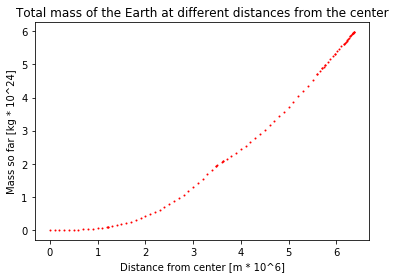

In [23]:
#plt.plot(radiusData/(10**6), [sphereMass(r)/(10**24) for r in radiusData])

plt.plot(radiusData/(10**6), massData/(10**24), "ro", markersize = 1)
plt.title("Total mass of the Earth at different distances from the center")
plt.xlabel("Distance from center [m * 10^6]")
plt.ylabel("Mass so far [kg * 10^24]")
plt.show()

### Manipulating data - Acceleration at different heights

The next step is to turn the datapoints into datapoints for the gravitational acceleration.

In [24]:
G = 6.674 * 10**(-11) #The gravitational constant
accelData = np.zeros(97)

for i in range(1,len(radiusData)):
    accelData[i] = G*massData[i]/(radiusData[i]**2) #Using the formula for gravity to find the gravity at each radius in the dataset

### Fitting the data - Creating a general function for acceleration

The next step is to go from datapoints at discrete distances from the center, to a general function that gives the mass between the datapoints. This can be acheived by using the polyfit function. This function finds the polynomial of the given degree that best approximates the datapoints given.

In [25]:
import numpy.polynomial.polynomial as poly #Used later for finding a polynomial that approximates the data

turn = np.argmax(accelData) #The spike in the acceleration graph, see the plot below.
deg = 3 #We are using thrid degree polynomials to fit the data
a0, a1, a2, a3 = poly.polyfit(radiusData[:turn], accelData[:turn], deg) #Coefficients for the polynomial fitting the points further in than the "spike"
b0, b1, b2, b3 = poly.polyfit(radiusData[turn:], accelData[turn:], deg) #Coefficients for the polynomial fitting the points further out than the "spike"

earthRadius = radiusData[-1]
earthMass = massData[-1]
def realGravityAccel(pos):
    dist = abs(pos) #The absolute value of the distance
    direc = -np.sign(pos) #The direction of gravity. It is opposite of our the sign of our position

    if dist > earthRadius: #If we are outside the Earth
        return(direc*G*earthMass/pos**2) #Normal formula for acceleration using the mass of the entire Earth

    elif dist < radiusData[turn]: #If we are further in than the "spike"
        return(direc * (a0 + a1*dist + a2*dist**2 + a3*dist**3))
    
    else: #Function 2 for distances further out than the "spike"
        return(direc * (b0 + b1*dist + b2*dist**2 + b3*dist**3))

You now have two polynomials that fit the data points for acceleration, the first one looks like this:

$$
\begin{align*}
f_1(r) &= a_0 + a_1r^1 + a_2r^2 + a_3r^3 \\
f_1(r) &= -2.93*10^{-2} + 3.88*10^{-6}r - 2.40*10^{-13}r^2 + 3.85*10^{-21}r^3
\end{align*}
$$

These polynomials approximate the actual data very well, to illustrate this, they can be plotted together with the data:

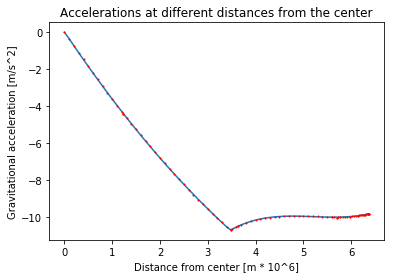

In [26]:
plt.plot(radiusData/(10**6), [realGravityAccel(r) for r in radiusData])
plt.plot(radiusData/(10**6), -accelData, "ro", markersize=1)

plt.title("Accelerations at different distances from the center")
plt.xlabel("Distance from center [m * 10^6]")
plt.ylabel("Gravitational acceleration [m/s^2]")
plt.show()

The red dots are the 97 discrete gravitational acceleration found using the datapoints from the PREM model. The blue line consists of two third degree polynomials that approximate these disctete points. The function **realGravityAccel** made the blue line, and is the function you will use later, instead of the **uniGravityAccel** function.

**EXERCISE 6:**

As you start falling, from the right of the graph, the acceleration will first stay nearly constant before increasing slightly until about 3500km from the center. Why is this? Where in the Earth's structure is gravity the strongest?

As you start falling, from the right of the graph, the acceleration will first stay nearly constant before increasing slightly until about 3500km. This is because, as you gets closer to the more dense inner parts of the Earth, the gravitational pull from them will increase. Since the outer layers are so much less dense than the mantle or core, you don't "lose" much gravitational pull compared to the pull you gain from being closer to the denser parts. When you are at around 3500 km, gravity starts weakening. This happens because the amount of mass pulling you down is starting to reduce fast. Gravity is at its strongest at the edge of the core at about 3500km.

## Calculating the fall through a non-uniform Earth

To calculate the movement through a non-uniform Earth, you will again need to define some paramaters and some lists or arrays to save your results in. Then you will need to use the Euler-Cromer method to calculate the movement step by step.

But before that, you need to take into account the variable density of the Earth.

### Initializing variables and arrays

**EXERCISE 7:**

Be careful to not give your arrays and variables the same names as previous ones.

**a)**
Define the lists or arrays that will hold the positions, velocities and accelerations at any given time during the fall. Use a time step of 1 second, and 5000 iterations in your loop.

**b)**
Make the starting distance from the center equal to the radius of the Earth, and make the starting velocity 0 m/s.

**c)**
Define a list or array that holds all of the different times, for plotting.

In [27]:
n = 5000
dt = 1

acc = np.zeros(n)
vel = np.zeros(n)
pos = np.zeros(n)

pos[0] = earthRadius

time = np.linspace(0, n*dt, n)

### The Euler-Cromer loop

**EXERCISE 8:**

Do the Euler-Cromer calculation of a fall through a uniform Earth with the initial conditions from exercise 7, and an acceleration given by the **realGravityAccel** function.

In [28]:
for i in range(n-1):
    acc[i] = realGravityAccel(pos[i])
    vel[i+1] = vel[i] + acc[i] * dt
    pos[i+1] = pos[i] + vel[i+1] * dt
acc[n-1] = realGravityAccel(pos[n-1])

### Plotting the results

**EXERCISE 9:**

Plot your results from exercise 8 (position, velocity and acceleration as a function of time).

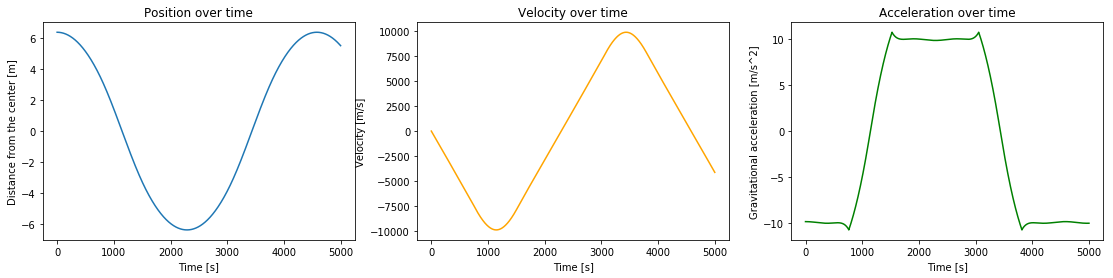

In [29]:
plt.figure(figsize=(19,4))
plt.subplot(131)
plt.plot(time, pos/(10**6))
plt.title("Position over time")
plt.xlabel("Time [s]")
plt.ylabel("Distance from the center [m]")

plt.subplot(132)
plt.plot(time, vel, color="orange")
plt.title("Velocity over time")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [m/s]")

plt.subplot(133)
plt.plot(time, acc, color="green")
plt.title("Acceleration over time")
plt.xlabel("Time [s]")
plt.ylabel("Gravitational acceleration [m/s^2]")
plt.show()

### Analyzing the results

**EXERCISE 10:**

**a)**

Explain why these graphs look so different to the ones in the uniform case:
  - How and why are the acceleration graphs different?
  - How and why are the velocity graphs different?
  - How and why are the position graphs different?

In the uniform case the acceleration graph is like a sine wave just like the position graph. In the non-uniform case the acceleration is large and negative for a while at the start, then quickly goes over to large and positive, as the high velocity quickly moves the falling object from one side of the core to the other.

In the uniform case the velocity graph changes smoothly in tandem with the acceleration, while in the non-uniform case it quickly goes from nothing to very negative to very positive and back again, with sharp turns. This is due to the high acceleration which changes direction quickly.

In the uniform case the position graph is like a sine wave, while in the non-uniform case it's slightly steeper. The volatile changes in acceleration and velocity result in only a slightly steeper position graph. The increased steepness is due to the higher velocity when moving through the core.

**b)**

Find the time it takes to fall through the non-uniform Earth.

Why would it take less/more time to fall through the non-uniform Earth when the Earth's total mass is the same in both cases?

In [30]:
print("It took {:.0f} seconds to fall through the Earth".format(time[np.argmin(pos)]))

It took 2290 seconds to fall through the Earth


It takes less time in the non-uniform case, as the acceleration stays high for a while after the start, making the velocity build up quickly. The breaking due to gravity also happens much later, resulting in a quick acceleration at the start and a quick deceleration at the end. This allows the velocity to stay high for much longer, resulting in a lower total time.

**c)**
Find the maximum velocity along the way. When is this velocity reached?

Why was it higher/lower when the Earth's total mass is the same in both cases?

In [32]:
print("The maximum velocity was {:.0f} m/s".format(np.amax(vel)))

The maximum velocity was 9920 m/s


In the uniform case, the total mass pulling you down decreases quickly, resulting in less acceleration. In the non-uniform case however, a lot of the Earth's mass is concentrated in the center, which means that the mass pulling you toward the center is greater, resulting in greater acceleration toward the center throughout the fall. This results in a higher top speed, which is reached at the center.

Some **optional** brain teasers:

 - If you started in the center, how fast would you need to go to reach the surface?
 - What would eventually happen if you included air resistance in your model?
 - Could the Earth's rotation affect the fall in any way?
 - Why is it extremely difficult to dig a tunnel through the Earth?

You would need to go 9920m/s or faster, which is the speed you would have when you're at the center in the fall through the Earth. This is because gravity slows you down going up exactly as much as it speeds you up going down.

If I included air resistance in my model, the object falling would slow down, eventually reaching a standstill in the center of the Earth.

If the fall was not from pole to pole the Earth's rotation would make the object falling fall in arcs around the center of the Earth.

As you dig further down, the increased pressure and temperature makes it extremely difficult to dig through the ground or operate equipment. This is before even reaching the mantle.